<a href="https://colab.research.google.com/github/chernandezrojas1991/exercises-u3-dl/blob/main/k_means_find_k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
path = "/content/drive/MyDrive/Coding Dojo/Unsupervised ML/Semana 1/cust_seg.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [22]:
df.columns

Index(['Unnamed: 0', 'Customer Id', 'Age', 'Edu', 'Years Employed', 'Income',
       'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio', 'cluster'],
      dtype='object')

In [10]:
df.dropna(inplace = True)

In [11]:
#Escalar datos
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

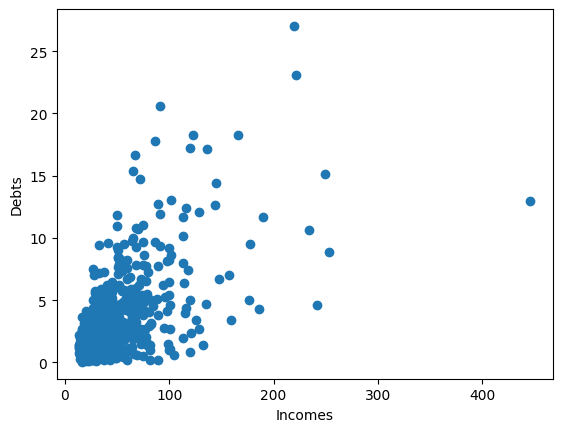

In [25]:
plt.scatter(df['Income'], df['Other Debt'])
plt.xlabel('Incomes')
plt.ylabel('Debts');

In [26]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

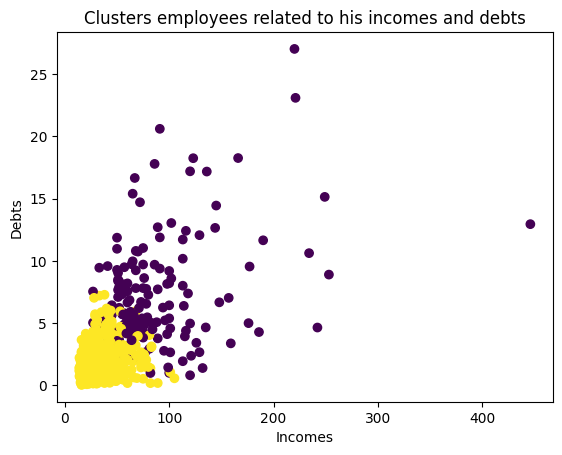

In [28]:
# Save the cluster labels to the dataframe
df['cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(df['Income'], df['Other Debt'], c = df['cluster'])
plt.xlabel('Incomes')
plt.ylabel('Debts')
plt.title('Clusters employees related to his incomes and debts');

Método del codo de inercia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'inertia')

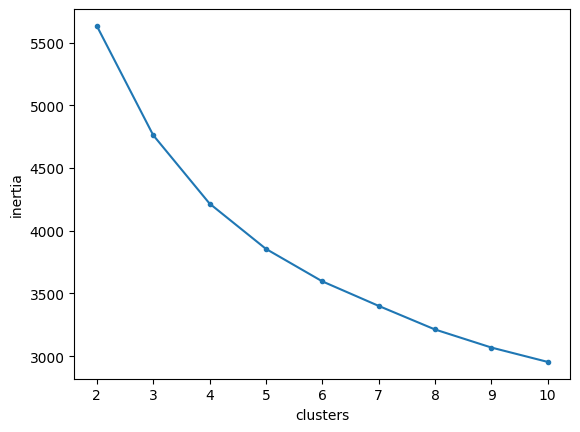

In [29]:
inertias = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

Score de Silueta

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

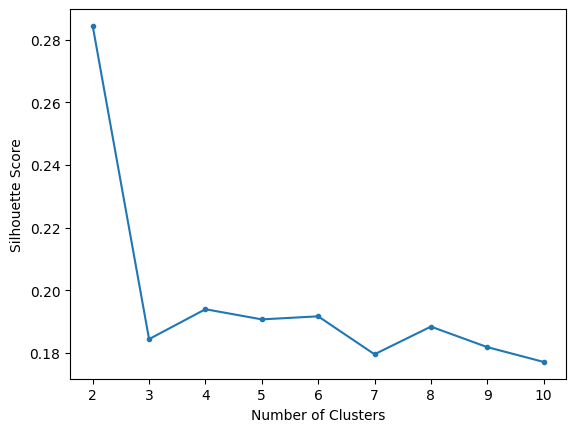

In [30]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

El método del codo y la silueta, ambos apuntan a una cantidad óptima de clústers igual a 3.

El valor escogido para los siguientes pasos será número de clústers igual a 3.

In [31]:
# Fit kmeans model with 3 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.18446020621502077

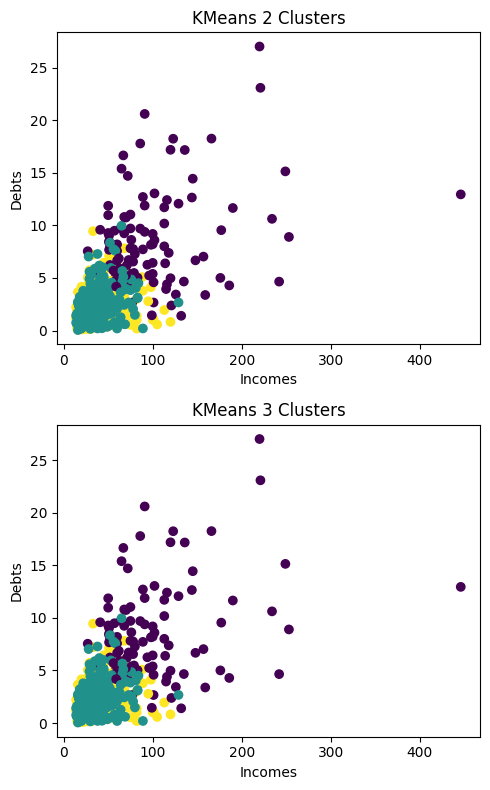

In [40]:
# Save the cluster labels to the dataframe
df['cluster2'] = kmeans.labels_
df['cluster3'] = kmeans.labels_
# Visualize the clusters
fig, axes = plt.subplots(2,1, figsize=(5,8))
axes[0].scatter(df['Income'], df['Other Debt'], c = df['cluster2'])
axes[0].set_xlabel('Incomes')
axes[0].set_ylabel('Debts')
axes[0].set_title('KMeans 2 Clusters')
axes[1].scatter(df['Income'], df['Other Debt'], c = df['cluster3'])
axes[1].set_xlabel('Incomes')
axes[1].set_ylabel('Debts')
axes[1].set_title('KMeans 3 Clusters')
plt.tight_layout();

Al agrupar por 3 clústers, se da cuenta que existen dos clústers aglutinados (muy juntos) con ingreso no mayor a 100 y deudas sobrepasando las 5 unidades (sea cual sea su moneda y escala). Por otro lado, el clúster denotado por el color púrpura, tiene mayor variación y dispersión, concentrándose en gran medida con un ingreso menor y superior a 100 cuyas deudas exceden las 5 unidades.